# **PROJECT OBJECTIVE:** *Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.*

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
#Importing all the necessary libraries
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") # To ignore any warnings

import tensorflow as tf
from tensorflow.keras.datasets import imdb # Loading Data
from tensorflow.keras.preprocessing.sequence import pad_sequences # Preprocessing

# Importing the libraries for model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten
from tensorflow.keras.backend import clear_session

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(tf.__version__)

2.5.0


## 1. Import and analyse the data set.

In [3]:
top_words = 10000
max_len = 500
embedding_size = 32

In [4]:
# Loading the dataset but only keep the top 10000 words, zero the rest
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [5]:
# Merging data to create features, labels and DataFrame
X = np.concatenate((X_train, X_test), axis=0) # Features
y = np.concatenate((y_train, y_test), axis=0) #Labels

data_raw = pd.DataFrame({'Review': X, 'Sentiment': y}) #DataFrame
data_raw.sample(5)

,Review,Sentiment
26204,"[1, 89, 70, 14, 20, 30, 2209, 449, 1243, 207, ...",0
20716,"[1, 13, 40, 1016, 5213, 2868, 13, 119, 3114, 5...",0
46744,"[1, 2, 9, 61, 514, 1143, 38, 54, 13, 557, 15, ...",1
32403,"[1, 42, 144, 13, 135, 3386, 642, 345, 96, 14, ...",0
6064,"[1, 14, 22, 65, 9, 78, 195, 63, 70, 593, 11, 1...",0


### Inference:- Reviews is already preprocessed and sentiments are in binary format.


In [6]:
# Summarizing dataset size
print("Total training data shape: ")
print("-" * 30)
print("Features: ", X.shape)
print("Labels: ", y.shape)

Total training data shape: 
------------------------------
Features:  (50000,)
Labels:  (50000,)


### Inference:- Total of 50000 movie reviews.

In [7]:
# Summarizing number of labels
print("Labels: ", np.unique(y))

Labels:  [0 1]


In [8]:
# Summarizing label count
data_raw['Sentiment'].value_counts()

1    25000
0    25000
Name: Sentiment, dtype: int64

### Inference:- The two sentiments are distributed equally in the dataset. 

In [9]:
# Summarizing number of words 
print("Number of words: ", len(np.unique(np.hstack(X))))

Number of words:  9998


Average Review length: 234.76
Standard Deviation: 172.91


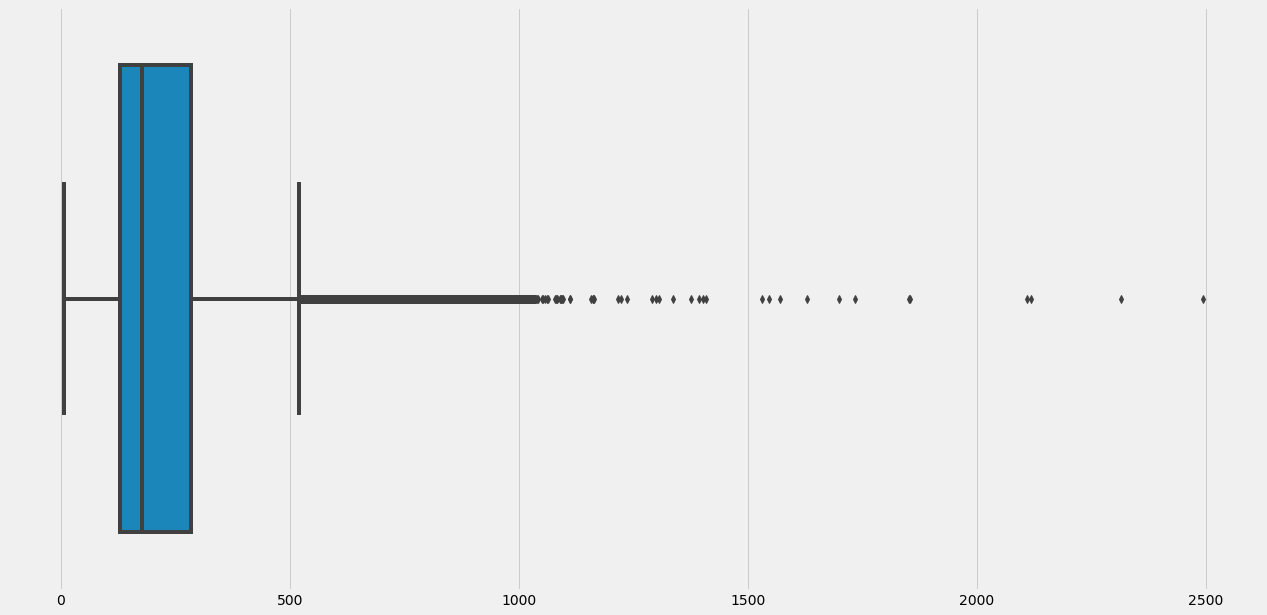

In [10]:
# Summarizing review length
length = [len(x) for x in X]
print("Average Review length: %.2f" % np.mean(length))
print("Standard Deviation: %.2f" % np.std(length))

# Plotting review length
plt.style.use('fivethirtyeight')
plt.figure(figsize= (20,10))
sns.boxplot(length)

### Inference:- Range of review length lies between 0 and 525.

## 2. Perform relevant sequence adding on the data

In [11]:
# pad dataset to a maximum review length in words
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

## 3. Perform following data analysis:

### a.Print shape of features and labels.

In [12]:
print("Shape of features: ", X.shape)
print("-" * 30)
print("Shape of labels: ", y.shape)

Shape of features:  (50000,)
------------------------------
Shape of labels:  (50000,)


### b.Print value of any one feature and it's label.

In [13]:
print("Label:", y[0])
print("-" * 30)
print("Feature: ")
print(X[0])

Label: 1
------------------------------
Feature: 
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## 4. Decode the feature value to get original sentence.

In [14]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in X[0]] )
print(decoded) 

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 5. Design, train, tune and test a sequential model.

In [15]:
print("Shape of Training Data: ", X_train.shape)
print('-' * 30)
print("Shape of Testing Data: ", X_test.shape)

Shape of Training Data:  (25000, 500)
------------------------------
Shape of Testing Data:  (25000, 500)


In [16]:
# Base Model Architechture
clear_session()
# Create the model
model = Sequential()
# Input Layer
model.add(Embedding(top_words, embedding_size, input_length=max_len))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.2, noise_shape=None, seed=None))
# Output Layer
model.add(Dense(1, activation='sigmoid'))
# Compling Model
adam_opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer= adam_opt, metrics=['accuracy'])
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 32)           320000    
_________________________________________________________________
dense (Dense)                (None, 500, 250)          8250      
_________________________________________________________________
dropout (Dropout)            (None, 500, 250)          0         
_________________________________________________________________
flatten (Flatten)            (None, 125000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               18750150  
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [17]:
batch_size = 128
epochs = 2

In [18]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = epochs, batch_size = batch_size, verbose=2)

Epoch 1/2
196/196 - 186s - loss: 0.4838 - accuracy: 0.7322 - val_loss: 0.2803 - val_accuracy: 0.8828
Epoch 2/2
196/196 - 185s - loss: 0.2097 - accuracy: 0.9207 - val_loss: 0.2828 - val_accuracy: 0.8821


In [19]:
# Final evaluation of the model
loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Train Accuracy: %.3f%%' % (acc*100))
print('Train Loss: %.3f'% loss)
print("-" * 30)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f%%' % (acc*100))
print('Test Loss: %.3f'% loss)

Train Accuracy: 96.472%
Train Loss: 0.121
------------------------------
Test Accuracy: 88.208%
Test Loss: 0.283


In [20]:
# Predicting for all of test dataset 
predictions = model.predict(X_test)
predictions[0]

array([0.19063598], dtype=float32)

In [21]:
# Inversing probability into test labels
rounded = [round(x[0]) for x in predictions]
predictions = rounded

Text(0.5, 1.0, 'Accuracy Score: 0.88208')

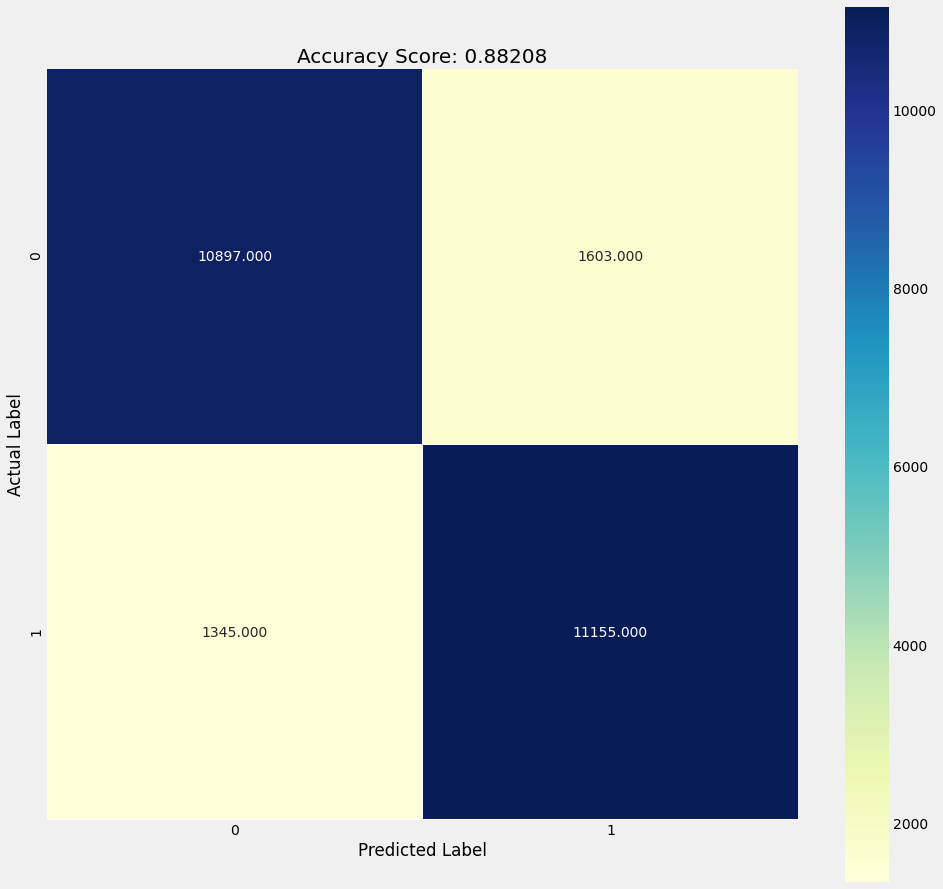

In [22]:
# Confusion Matrix

cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot = True, fmt = '.3f', linewidths = .5, square = True, cmap="YlGnBu")
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title, size = 20)

### Inferences:-
### 1. About 1300 labels are wrongly classified in 0.
### 2. About 1600 labels are wrongly classified in 1.

In [23]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



### Inference:- f1-score for 0's and 1's are same. Also macro avg f1-score is same to accuracy and weighted avg f1-score.

In [24]:
# Plotting History
def plot_history(history):
    # Storing Accuracies and Losses data of Training and Validation
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    # Features settings for plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Accuracy (%) ==>')
    plt.plot(x, acc, 'c', label='Training acc')
    plt.plot(x, val_acc, 'm', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch ==>')
    plt.ylabel('Loss ==>')
    plt.plot(x, loss, 'c', label='Training loss')
    plt.plot(x, val_loss, 'm', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

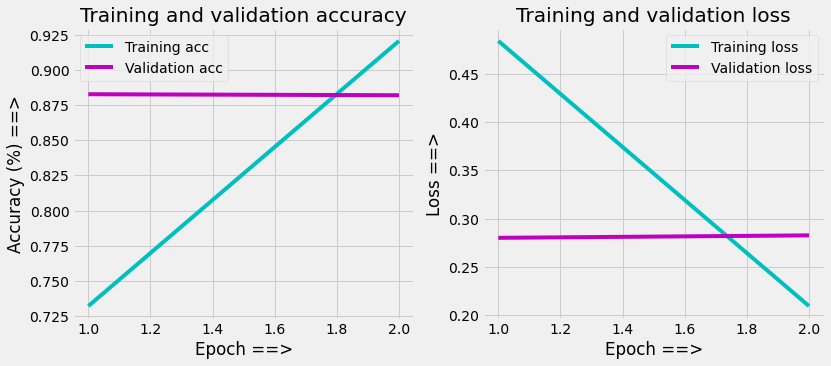

In [25]:
plot_history(history)

### Inference:- From the above plot it can be concluded that this model has low learning rate and has a little problem of overfitting.

## 6. Use the designed model to print the prediction on any one sample.

In [26]:
# Creating word dictionary for comparing with the random input sample
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }

In [27]:
def predict_on_sample(text):
    # Preparing the input by removing punctuation characters, converting characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generating an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = pad_sequences([input], maxlen=max_len)

    # Predicting on sample using the model and returning the result
    result = model.predict(np.array([padded_input][0]))[0][0]

    # Checking the result for Positive or Negative Prediction
    predicted_sentiment = ""
    if round(result) == 1:
      predicted_sentiment = "Predicted Sentiment is Positive"
    else:
      predicted_sentiment = "Predicted Sentiment is Negative" 

    return result, predicted_sentiment

In [28]:
# Passing a random positive movie review of from google for prediction
result, predicted_sentiment = predict_on_sample("This movie, as far as J-Statham films goes, was phenomenal. If you are going into this expecting an action film, you are definitely getting more than you bargained for.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

Predicted Probability :  0.78588355
------------------------------
Predicted Sentiment is Positive


In [29]:
# Passing a random negative movie review from google for prediction
result, predicted_sentiment = predict_on_sample("I was completely wrong.  The acting and dialogue were horrible.  Couldn’t decide if the screenwriter hurt the acting or the actors butchered the script.  Both were equally awful.")
print("Predicted Probability : ", result)
print("-" * 30)
print(predicted_sentiment)

Predicted Probability :  0.015874863
------------------------------
Predicted Sentiment is Negative


### Inference:- The model is predicting very good on the random sample taken from google for the same movie. This is probably because these reviews contains the words from top 10000 words used from dataset.